In [45]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mticker
import matplotlib as mpl

from scipy import integrate

## Q1: Simple numerical integral

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

In [46]:
def f_Q1(x):
    return np.exp(-x**2)

In [47]:
I_true, err_true = integrate.quad(f_Q1, -5., 5.)
print(I_true, err_true)

1.7724538509027912 4.6576049804237824e-14


Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  Here, we create the sampling from a uniform distribution

In [48]:
N_32 = 32
x_32 = np.linspace(-5, 5, N_32) #points
f_32 = np.exp(-x_32**2) #sampled values
#f_32

Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points

In [49]:
# I define a function to integrate and compute the diff with the true value for each N

def integrator(I_true, N): # takes the true evaluation and N_points
    x = np.linspace(-5, 5, N) # points
    f = np.exp(-x**2) # sampled values
    I = integrate.simps(f, x) # integrate
    diff = abs(I_true - I) # compute the estimated error as the difference with the true value
    return diff

In [50]:
N_points = [32, 64, 128, 256]
errors = np.array([integrator(I_true, N) for N in N_points])

Make a plot of the error (compared to the quadrature result) vs. N

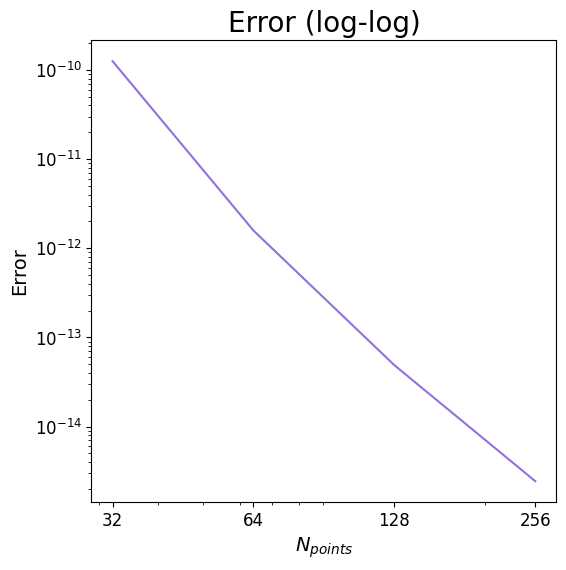

In [51]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(N_points, errors, color='mediumpurple')
ax.set_xlabel(r"$N_{points}$", size=14)
ax.set_ylabel("Error", size=14)
ax.set_xscale('log')
ax.set_yscale('log')

plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())

plt.xticks([32, 64, 128, 256])
plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=12)

plt.title('Error (log-log)', size=20)
plt.show()

## Q3: Basins of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods  becauses it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

In [37]:
from scipy import optimize

def q(x):
    return x**3 - 2*x**2 - 11*x + 12

Text(0, 0.5, 'q(x)')

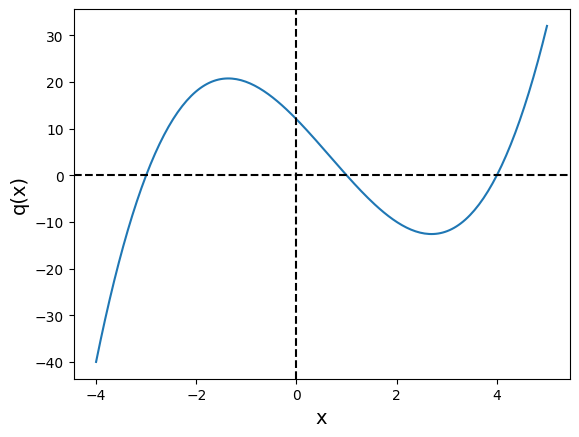

In [40]:
x = np.linspace(-4,5,200)
#x
fig, ax = plt.subplots()
ax.plot(x, q(x))
plt.axhline(y=0, linestyle='--', c='black')
plt.axvline(x=0, linestyle='--', c='black')
plt.xlabel('x', size=14)
plt.ylabel('q(x)', size=14)

In [41]:
root1, r1 = optimize.brentq(q, -5., -2., full_output=True)
print(root1, r1.converged)

-3.0 True


In [44]:
root2, r2 = optimize.brentq(q, -2., 2., full_output=True)
print(root2, r2.converged)

1.0000000000000002 True


In [43]:
root3, r3 = optimize.brentq(q, 2., 5., full_output=True)
print(root3, r3.converged)

4.0 True
